##  **CYBERSECURITY: Cyber Threat Detection**

## Introduction

The word cybersecurity is a combination of two words: Cyber and Security. 
The term cyber is relating to or a collection of computers in network or related to information Technology (IT) and the later means we need to have all these devices secured. The development of smart devices (e.g.  handheld devices, computers etc)  can also behave like a network due to the way they normally connect to internet using the IP address as is for PC. We therefore need to create an environment cyber-security to keep Internet of Things (IoT) devices secure. Predomintaly the security of these IoT devices performed without using Machine Learning (ML). And at the moment malicious attacks are increasing tremendously and existing systems could not withstand some of them. Through opting to using Machine Learning we can hope to have stronger system than herefore. If we can combine Intrusion Detection System with some of the Machine Learning Technologies we can even get more accurate results ([Choudharya et al.](https://www.sciencedirect.com/science/article/pii/S1877050920308334) ). By using analysis, self-training, observation, and past experience, ML just gets better at identifying malicious code.

To allow access over the network, IoT devices should register theirself to make sure that they are free from intruders. It is necessary
to monitor the all incoming and outgoing traffic of each object. Also, maintain a template for normal behavior of the
network traffic. Now, if any value fails to fall into the normal behavior category then it is identified as the attack and
raised the alarm as a signal to the owner of the respected devices.

## Why do we need Machine Learning (ML) in cybersecurity

- Increase of IoT devices
- Big data (Keeping confidential inforamtion)
- Increase in number of attacks (that may be sophisticated)
- More network logs generated by devices and that are difficult to analyze them manually.
- IDS are mostly pattern based devices (difficult to detect new attacks for which no pattern is available ie is packet matching) 
- Detecting Zero Day Attacks


## Applications areas of ML in cybersecurity

+ Banking : Credit card fraud detection
+ Websites : Malicious and benign websites
+ Emails: Spam Detection
+ Tweeter: Cyber bullying
+ Risk assessment
+ Phishing emails
+ Network monitoring for cyber-attacks identification
+ etc

## Example: Network Intrusions Detector System

 1.0. Dataset 

In 1999 KDD’99 data set was created by DARPA using recorded network traffic dataset. It is contains 41 features per network connection. These features in KDD’99 data set are classified into four groups that is Basic features of individual TCP connections, Content features within a connection suggested by domain knowledge, Traffic features computed using a two-second time window and Host features are the attributes designed to assess attacks which last for more than two seconds. The dataset consists of 5,209,458 records (among which 4,898,430 records are for training and 311,028 records are for testing) which is extremely very good to give a model to learn from different attacks types. By the assumption of the data set distribution which requires to at least to have both train and test data to come from the same distribution, that's not the case for KDD data set; test data is not from the same probability distribution as the training data, and it includes some specific attack types not in the training data.  The KDD dataset attack's types falls into the main four categies, which are DoS (denial-of-service), R2L (unauthorized access from a remote machine), U2R (unauthorized access to local superuser (root) privileges,) and Probe. Different data mining approaches have been applied to the KDD’99 data set to building intrusion detection system (IDS) that is to be used to detect intrusions in network traffic.

It is unfortunate that this KDD data set have two critical issues that can absolutely affect the performance of the system. The most significant issue in KDD data set is that it has large number of dublicated records. It is found that about 78.05% and 75.12% records are duplicate in training and testing data set respectively. This huge number of replicated records may lead the learning algorithms to be partial on them instead of numerous records. Therefore, the algorithm will stop learning infrequent records and won't be able to generalize well on unseen samples.

1.1. Machine Learning Algorithms

The KDD cup 99 dataset is a labelled dataset. In ML we classify three types of machine learning namely: **Supervised, un-supervised
and, semi-supervised learning**. Common machine learning algorithms are Support Vector Machine (SVM), logistic
regression, naive-bayes classifier, linear regression, K-nearest neighbor (KNN), artificial neural network (ANN), deep
neural network (DNN). Under this task I used Support Vector Machine (SVM), logistic regression, naive-bayes, Ensembling trees (RandomForest and ExtraGradientTree) classifiers for this classification problem.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC, SVC

from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
list_of_features = []
with open("Alistoffeatures.txt", 'r') as f:
    features_act = f.readlines()
features_act = features_act[1:]

for ft in features_act:
    list_of_features.append(ft.split(":")[0])


In [3]:
with gzip.open('./testcorrected.gz', 'r') as f:
    testdata = pd.read_csv(f)
    testdata.columns = list_of_features    

In [4]:
testdata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [5]:
with gzip.open('./kddcup.data.gz', 'r') as f:
    traindata = pd.read_csv(f)
    traindata.columns = list_of_features

In [6]:
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
traindata.shape, testdata.shape

((4898430, 42), (311028, 42))

In [8]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [9]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311028 entries, 0 to 311027
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     311028 non-null  int64  
 1   protocol_type                311028 non-null  object 
 2   service                      311028 non-null  object 
 3   flag                         311028 non-null  object 
 4   src_bytes                    311028 non-null  int64  
 5   dst_bytes                    311028 non-null  int64  
 6   land                         311028 non-null  int64  
 7   wrong_fragment               311028 non-null  int64  
 8   urgent                       311028 non-null  int64  
 9   hot                          311028 non-null  int64  
 10  num_failed_logins            311028 non-null  int64  
 11  logged_in                    311028 non-null  int64  
 12  num_compromised              311028 non-null  int64  
 13 

In [10]:
traindata.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
testdata.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### Checking for duplicated values

In [12]:
traindata[traindata.duplicated()].shape

(3823439, 42)

In [13]:
testdata[testdata.duplicated()].shape

(233737, 42)

In [14]:
traindata = traindata.drop(traindata[traindata.duplicated()].index)
testdata = testdata.drop(testdata[testdata.duplicated()].index)

#### Features transformation

In [15]:
traindata['land'] = traindata['land'].astype(object)
traindata['logged_in'] = traindata['logged_in'].astype(object) 
traindata['root_shell'] = traindata['root_shell'].astype(object) 
traindata['su_attempted'] = traindata['su_attempted'].astype(object) 
traindata['is_host_login'] = traindata['is_host_login'].astype(object) 
traindata['is_guest_login'] = traindata['is_guest_login'].astype(object) 


testdata['land'] = testdata['land'].astype(object)
testdata['logged_in'] = testdata['logged_in'].astype(object) 
testdata['root_shell'] = testdata['root_shell'].astype(object) 
testdata['su_attempted'] = testdata['su_attempted'].astype(object) 
testdata['is_host_login'] = testdata['is_host_login'].astype(object) 
testdata['is_guest_login'] = testdata['is_guest_login'].astype(object) 

In [16]:
def get_unique(dataframe):
    
    obj_features = [column for column in dataframe.columns if dataframe[column].dtype == "object"]
    
    for c in obj_features:
        print("Object Feature:", c)
        print(dataframe[c].unique())
        print(">>>>>>>>>>>>>>>>>>>>>>")
    

In [17]:
get_unique(traindata)

Object Feature: protocol_type
['tcp' 'udp' 'icmp']
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: service
['http' 'smtp' 'domain_u' 'auth' 'finger' 'telnet' 'eco_i' 'ftp' 'ntp_u'
 'ecr_i' 'other' 'urp_i' 'private' 'pop_3' 'ftp_data' 'netstat' 'daytime'
 'ssh' 'echo' 'time' 'name' 'whois' 'domain' 'mtp' 'gopher' 'remote_job'
 'rje' 'ctf' 'supdup' 'link' 'systat' 'discard' 'X11' 'shell' 'login'
 'imap4' 'nntp' 'uucp' 'pm_dump' 'IRC' 'Z39_50' 'netbios_dgm' 'ldap'
 'sunrpc' 'courier' 'exec' 'bgp' 'csnet_ns' 'http_443' 'klogin' 'printer'
 'netbios_ssn' 'pop_2' 'nnsp' 'efs' 'hostnames' 'uucp_path' 'sql_net'
 'vmnet' 'iso_tsap' 'netbios_ns' 'kshell' 'urh_i' 'http_2784' 'harvest'
 'aol' 'tftp_u' 'http_8001' 'tim_i' 'red_i']
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: flag
['SF' 'S2' 'S1' 'S3' 'OTH' 'REJ' 'RSTO' 'S0' 'RSTR' 'RSTOS0' 'SH']
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: land
[0 1]
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: logged_in
[1 0]
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: root_shell
[0 1]
>>>>>>>>>>

In [18]:
get_unique(testdata)

Object Feature: protocol_type
['udp' 'tcp' 'icmp']
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: service
['private' 'domain_u' 'http' 'smtp' 'ftp_data' 'ftp' 'eco_i' 'other'
 'auth' 'ecr_i' 'IRC' 'X11' 'finger' 'time' 'domain' 'telnet' 'pop_3'
 'ldap' 'login' 'name' 'ntp_u' 'http_443' 'sunrpc' 'printer' 'systat'
 'tim_i' 'netstat' 'remote_job' 'link' 'urp_i' 'sql_net' 'bgp' 'pop_2'
 'tftp_u' 'uucp' 'imap4' 'pm_dump' 'nnsp' 'courier' 'daytime' 'iso_tsap'
 'echo' 'discard' 'ssh' 'whois' 'mtp' 'gopher' 'rje' 'ctf' 'supdup'
 'hostnames' 'csnet_ns' 'uucp_path' 'nntp' 'netbios_ns' 'netbios_dgm'
 'netbios_ssn' 'vmnet' 'Z39_50' 'exec' 'shell' 'efs' 'klogin' 'kshell'
 'icmp']
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: flag
['SF' 'RSTR' 'S1' 'REJ' 'S3' 'RSTO' 'S0' 'S2' 'RSTOS0' 'SH' 'OTH']
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: land
[0 1]
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: logged_in
[0 1]
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: root_shell
[0 1]
>>>>>>>>>>>>>>>>>>>>>>
Object Feature: su_attempted
[0 1 2]

### creating target label

In [19]:
def create_label(dataframe):
    a = []
    for v in dataframe['attack_type']:
        if v =='normal.':
            a.append(0)
        else:
            a.append(1)
    dataframe['connection_state'] = a
    return dataframe   

In [20]:
train = create_label(traindata)
test = create_label(testdata)

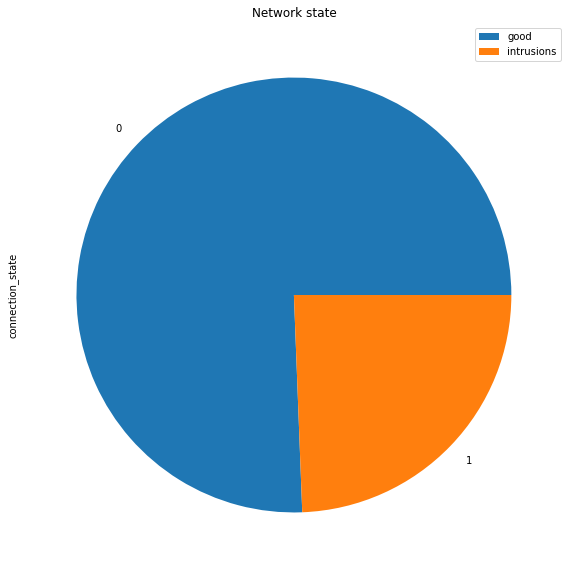

In [21]:
netw_label = train['connection_state'].value_counts()

netw_label.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title('Network state')
plt.legend(['good','intrusions'])
plt.show()

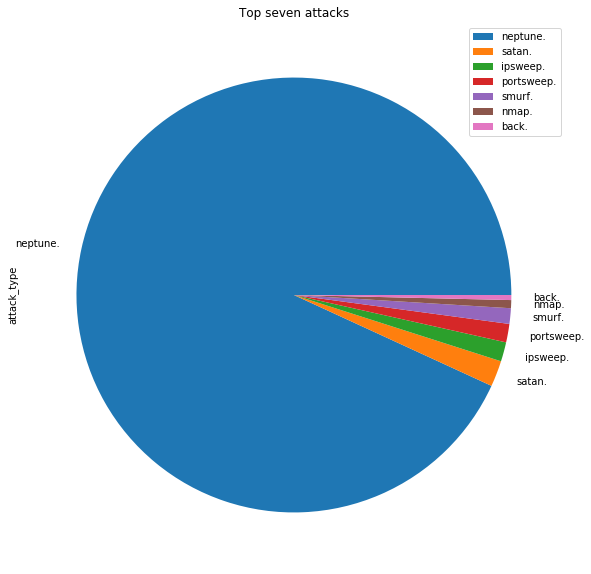

In [22]:
newattacksdf = train[train['attack_type'] != 'normal.']

attacks = newattacksdf['attack_type'].value_counts()[:7]

attacks.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title('Top seven attacks')
plt.legend(loc='best')
plt.show()

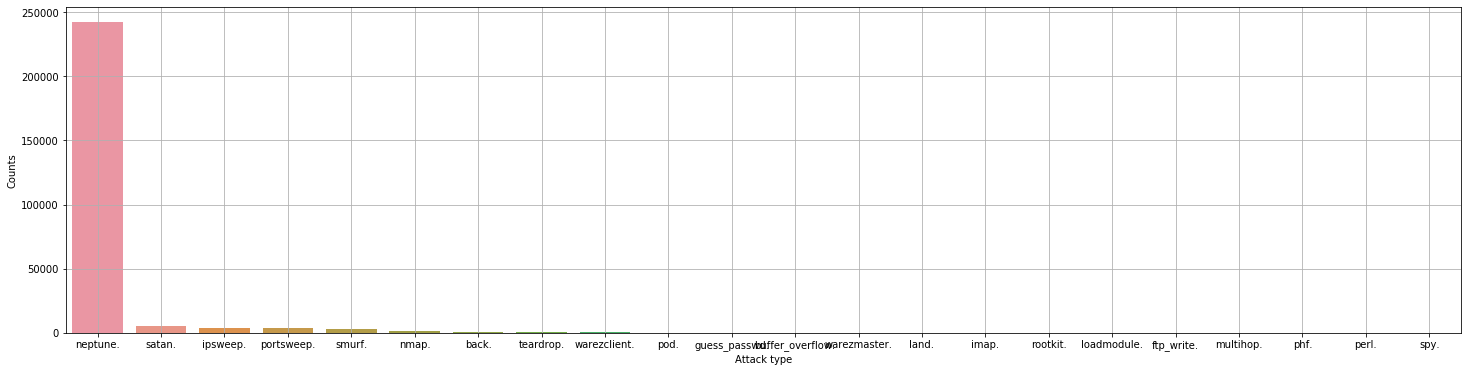

In [23]:
plt.figure(figsize=(25,6))
sns.barplot(x=newattacksdf['attack_type'].value_counts().index, y=newattacksdf['attack_type'].value_counts())
plt.xlabel("Attack type")
plt.ylabel("Counts")
plt.grid(True)

In [24]:
newattacksdf.groupby('attack_type')['duration'].mean()

attack_type
back.                  0.293388
buffer_overflow.      91.700000
ftp_write.            32.375000
guess_passwd.          2.716981
imap.                  6.000000
ipsweep.               3.495568
land.                  0.000000
loadmodule.           36.222222
multihop.            184.000000
neptune.               0.000008
nmap.                  0.000000
perl.                 41.333333
phf.                   4.500000
pod.                   0.000000
portsweep.          6805.840348
rootkit.             100.800000
satan.                 0.095238
smurf.                 0.000000
spy.                 318.000000
teardrop.              0.000000
warezclient.         702.740202
warezmaster.          15.050000
Name: duration, dtype: float64

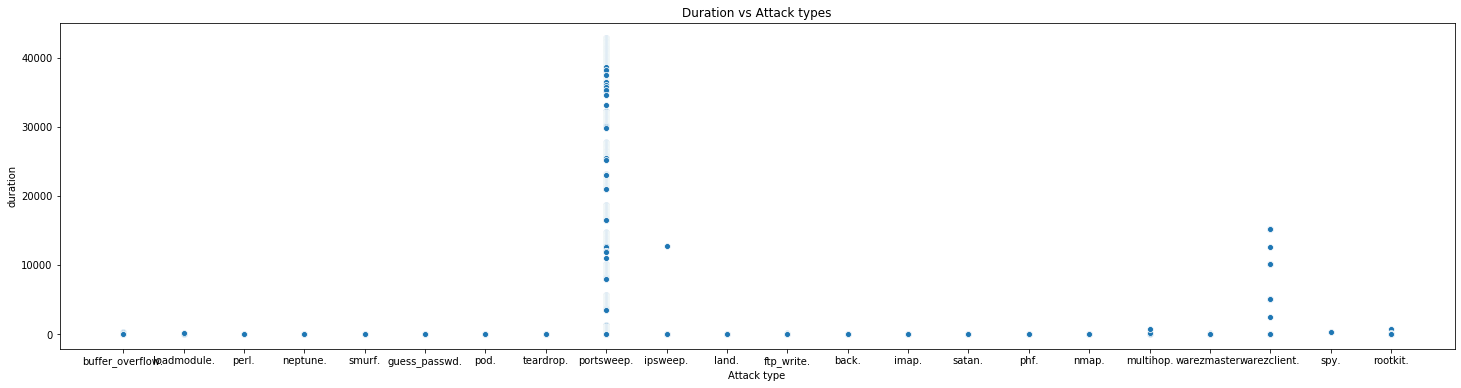

In [25]:
plt.figure(figsize=(25,6))
sns.scatterplot(x=newattacksdf['attack_type'], y=newattacksdf['duration'])
plt.title('Duration vs Attack types')
plt.xlabel("Attack type")
plt.ylabel("duration")
plt.show()

### check if connection is from/to the same host/port (1), otherwise 0

In [26]:
(newattacksdf['land'].value_counts()/newattacksdf['land'].value_counts().sum())*100

0    99.992753
1     0.007247
Name: land, dtype: float64

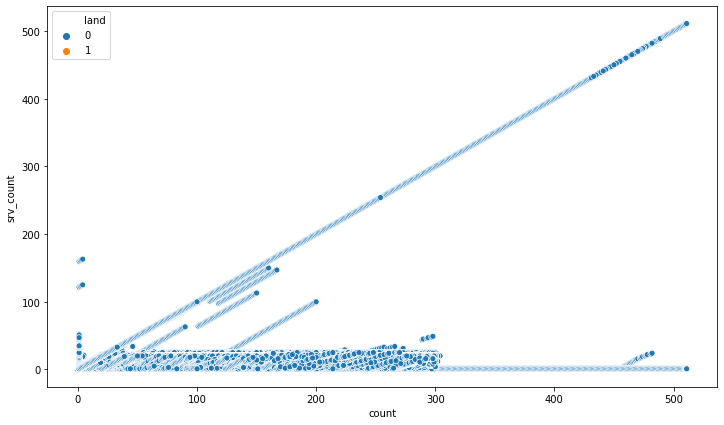

In [30]:
# plt.figure(figsize=(12,7))
# sns.scatterplot(x='count',y='srv_count', hue='land',data=newattacksdf)
# plt.show()

Text(0.5, 1.0, '% of Dest attacked services')

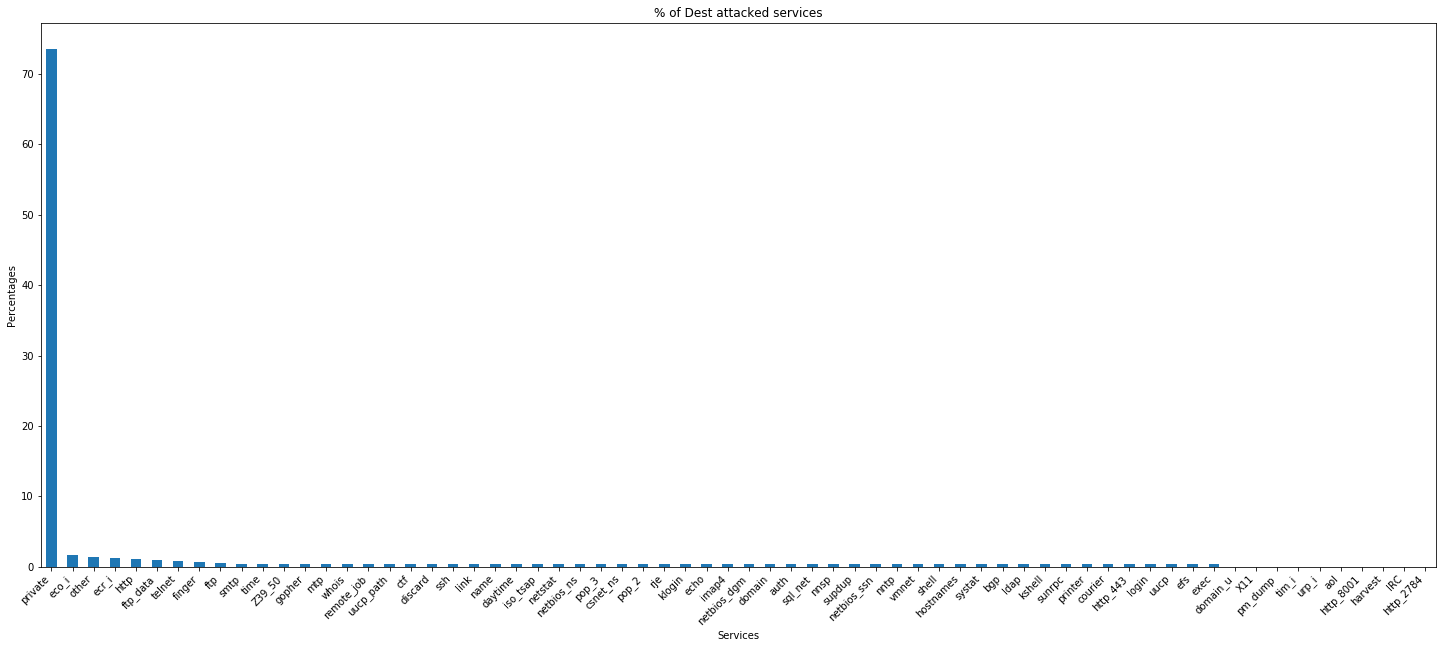

In [27]:
plt.figure(figsize=(25,10))

chrt = (newattacksdf['service'].value_counts()*100/newattacksdf['service'].value_counts().sum()).plot(kind='bar')
chrt.set_xticklabels(chrt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Services')
plt.ylabel("Percentages")
plt.title("% of Dest attacked services")

The destination private network service is most attacked of over 70\%

In [28]:
# g = sns.FacetGrid(newattacksdf, col="attack_type",  row="service")
# g = g.map(plt.hist, "duration")
high_attacker = pd.DataFrame(newattacksdf.groupby('attack_type')['service'].value_counts())
high_attacker.columns = ['counts']
high_attacker[high_attacker['counts']==max(high_attacker['counts'])]

,,counts
attack_type,service,
neptune.,private,185900


It clear the  same attaker neptune attacks frequently the destination private network service

In [29]:
train_cat_features = [column for column in train.columns if train[column].dtype == "object"]
train_numerical_features = [column for column in train.columns if column not in train_cat_features and column != 'num_outbound_cmds']
test_cat_features = [column for column in testdata.columns if testdata[column].dtype == "object"]

train[train_numerical_features].describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_state
count,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,...,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06,1.074991e+06
mean,1.348910e+02,5.837545e+03,4.873692e+03,2.735837e-03,3.627937e-05,5.427952e-02,1.460477e-04,3.570821e-02,5.875305e-02,5.416790e-03,...,1.592093e+02,6.700950e-01,4.949896e-02,9.335771e-02,2.173604e-02,1.906582e-01,1.901298e-01,7.954107e-02,7.829669e-02,2.438886e-01
std,1.321606e+03,2.009618e+06,1.376867e+06,8.835990e-02,1.540163e-02,9.974622e-01,1.558113e-02,8.232100e+00,8.406156e+00,2.650496e-01,...,1.098841e+02,4.259515e-01,1.310802e-01,2.298292e-01,5.636311e-02,3.907622e-01,3.913480e-01,2.621996e-01,2.609841e-01,4.294265e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.800000e+01,7.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.190000e+02,3.320000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.480000e+02,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.060000e+02,1.721000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,1.000000e+00,6.000000e-02,4.000000e-02,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,7.479000e+03,7.468000e+03,4.300000e+01,...,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [30]:
train['num_outbound_cmds'].value_counts()

0    1074991
Name: num_outbound_cmds, dtype: int64

In [31]:
train.drop("num_outbound_cmds", axis=1, inplace=True)
test.drop("num_outbound_cmds", axis=1, inplace=True)

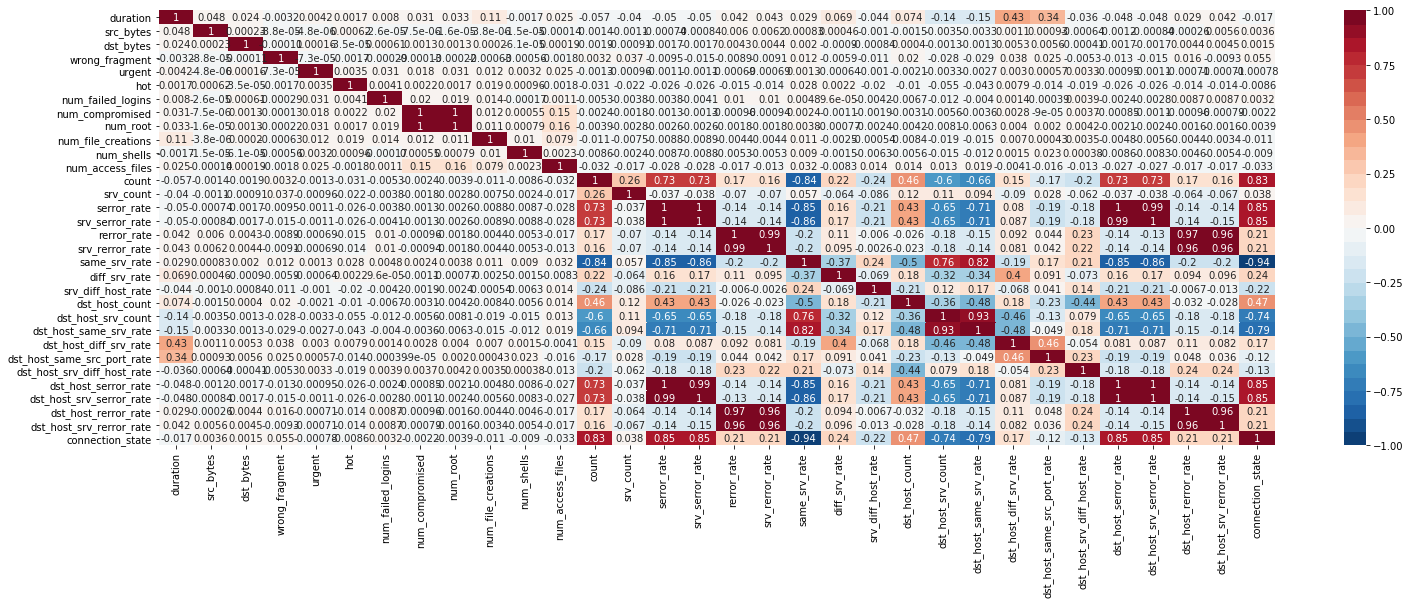

In [32]:
plt.figure(figsize=(25,8))
sns.heatmap(train[train_numerical_features].corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 32))
plt.show()

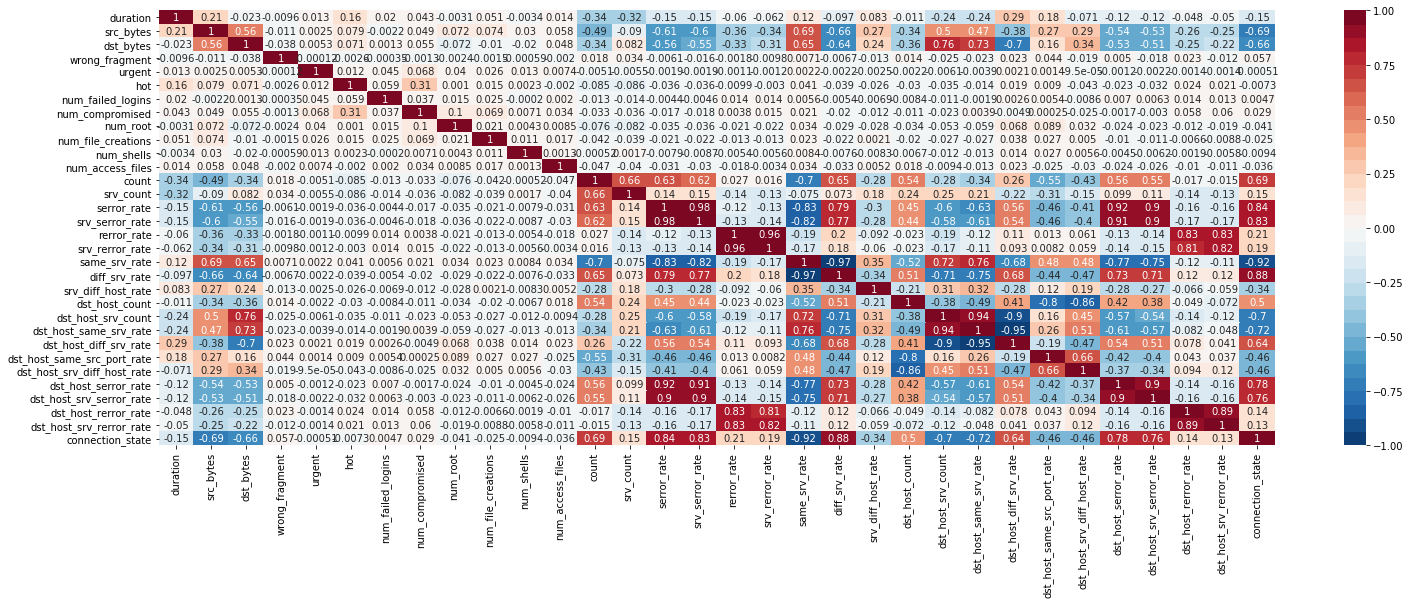

In [33]:
plt.figure(figsize=(25,8))
sns.heatmap(train[train_numerical_features].corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 32))
plt.show()

##### Split into train and valid datasets

In [34]:
newtrain = train.sample(frac=0.7, random_state=123)
newvalid = train.drop(newtrain.index).reset_index(drop=True)
newtrain = newtrain.reset_index(drop=True)

In [35]:
train_target = newtrain.pop('connection_state')
valid_target = newvalid.pop('connection_state')
test_target = test.pop('connection_state')

In [36]:
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = LinearSVC()
extra_clf = ExtraTreeClassifier()
nb_clf = GaussianNB()

### **Train with only numerical features with no preprocessing**

In [37]:
t_num_features = [column for column in newtrain.columns if column not in train_cat_features and column not in ['connection_state']]
test_num_features = [column for column in test.columns if column not in test_cat_features and column not in ['connection_state']]

In [87]:
assert len(t_num_features) == len(test_num_features)

In [88]:
lr_clf.fit(newtrain[t_num_features],train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
pred_lr = lr_clf.predict(newvalid[t_num_features])

In [90]:
pred_lr = lr_clf.predict(newvalid[t_num_features])
print(f'Classification Report {lr_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_lr))

Classification Report LogisticRegression

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    243609
           1       0.98      0.92      0.95     78888

    accuracy                           0.98    322497
   macro avg       0.98      0.96      0.97    322497
weighted avg       0.98      0.98      0.98    322497



In [91]:
prlr = lr_clf.predict(test[test_num_features]) 
print(classification_report(test_target, prlr))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     47913
           1       0.97      0.74      0.84     29378

    accuracy                           0.89     77291
   macro avg       0.91      0.86      0.88     77291
weighted avg       0.90      0.89      0.89     77291



In [92]:
rf_clf.fit(newtrain[t_num_features],train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
pred_rf = rf_clf.predict(newvalid[t_num_features])
print(f'Classification Report {rf_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_rf))

Classification Report RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243609
           1       1.00      1.00      1.00     78888

    accuracy                           1.00    322497
   macro avg       1.00      1.00      1.00    322497
weighted avg       1.00      1.00      1.00    322497



In [98]:
prrf = rf_clf.predict(test[test_num_features]) 
print(classification_report(test_target, prrf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     47913
           1       0.99      0.83      0.90     29378

    accuracy                           0.93     77291
   macro avg       0.95      0.91      0.92     77291
weighted avg       0.94      0.93      0.93     77291



In [ ]:
svm_clf.fit(newtrain[t_num_features],train_target)

In [100]:
pred_svm = svm_clf.predict(newvalid[t_num_features])
print(f'Classification Report for {svm_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_svm))

Classification Report for LinearSVC

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    243609
           1       0.90      0.97      0.94     78888

    accuracy                           0.97    322497
   macro avg       0.95      0.97      0.96    322497
weighted avg       0.97      0.97      0.97    322497



In [103]:
presvm = svm_clf.predict(test[test_num_features]) 
print(classification_report(test_target, presvm))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     47913
           1       0.96      0.79      0.87     29378

    accuracy                           0.91     77291
   macro avg       0.92      0.89      0.90     77291
weighted avg       0.91      0.91      0.91     77291



In [101]:
extra_clf.fit(newtrain[t_num_features],train_target)

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [102]:
pred_extra = extra_clf.predict(newvalid[t_num_features])
print(f'Classification Report for {extra_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_extra))

Classification Report for ExtraTreeClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243609
           1       1.00      1.00      1.00     78888

    accuracy                           1.00    322497
   macro avg       1.00      1.00      1.00    322497
weighted avg       1.00      1.00      1.00    322497



In [104]:
prextra = extra_clf.predict(test[test_num_features]) 
print(classification_report(test_target, prextra))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     47913
           1       0.99      0.82      0.90     29378

    accuracy                           0.93     77291
   macro avg       0.94      0.91      0.92     77291
weighted avg       0.93      0.93      0.93     77291



In [105]:
nb_clf.fit(newtrain[t_num_features],train_target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
pred_nb = nb_clf.predict(newvalid[t_num_features])
print(f'Classification Report for {nb_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_nb))

Classification Report for GaussianNB

              precision    recall  f1-score   support

           0       0.76      0.99      0.86    243609
           1       0.43      0.02      0.04     78888

    accuracy                           0.75    322497
   macro avg       0.60      0.51      0.45    322497
weighted avg       0.68      0.75      0.66    322497



### **Train with only numerical features with preprocessing**

In [38]:
num_select = ColumnTransformer(remainder='drop', transformers=[('scaling', RobustScaler(),t_num_features)])

In [108]:
pipe = Pipeline([
    ('transformer', num_select),
    ('clf', lr_clf)
])
pipe.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_

In [109]:
pred_pipelr = pipe.predict(newvalid)
print(f'Classification Report {lr_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_pipelr))

Classification Report LogisticRegression

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    243609
           1       0.99      0.93      0.96     78888

    accuracy                           0.98    322497
   macro avg       0.98      0.96      0.97    322497
weighted avg       0.98      0.98      0.98    322497



In [110]:
piperf = Pipeline([
    ('transformer', num_select),
    ('clf', rf_clf)
])
piperf.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_

In [111]:
pred_piperf = piperf.predict(newvalid)
print(f'Classification Report {rf_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_piperf))

Classification Report RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243609
           1       1.00      1.00      1.00     78888

    accuracy                           1.00    322497
   macro avg       1.00      1.00      1.00    322497
weighted avg       1.00      1.00      1.00    322497



In [112]:
pipenb = Pipeline([
    ('transformer', num_select),
    ('clf', nb_clf)
])
pipenb.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_

In [113]:
pred_pipenb = pipenb.predict(newvalid)
print(f'Classification Report {nb_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_pipenb))

Classification Report GaussianNB

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    243609
           1       0.96      0.96      0.96     78888

    accuracy                           0.98    322497
   macro avg       0.97      0.97      0.97    322497
weighted avg       0.98      0.98      0.98    322497



In [114]:
pipesvm = Pipeline([
    ('transformer', num_select),
    ('clf', svm_clf)
])
pipesvm.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_

In [115]:
pred_pipesvm = pipesvm.predict(newvalid)
print(f'Classification Report {svm_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_pipesvm))

Classification Report LinearSVC

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    243609
           1       0.99      0.97      0.98     78888

    accuracy                           0.99    322497
   macro avg       0.99      0.98      0.99    322497
weighted avg       0.99      0.99      0.99    322497



we can see that standadizing numerical features does improve the models performance (SVM and Gaussian Naive Bayes)

### **Training with all features and preprocessing**

In [116]:
assert len(test_cat_features)==len(train_cat_features)

In [138]:
## Convert to categories
newtrain[train_cat_features] = newtrain[train_cat_features].apply(LabelEncoder().fit_transform)
newvalid[train_cat_features] = newvalid[train_cat_features].apply(LabelEncoder().fit_transform)
test[test_cat_features] = test[test_cat_features].apply(LabelEncoder().fit_transform) 

In [118]:
num_select1 = ColumnTransformer(remainder='passthrough', transformers=[('scaling', RobustScaler(),t_num_features)])
lr_pipe = Pipeline([
    ('ft_union', num_select1),
    ('lr', lr_clf)
])

lr_pipe.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('ft_union',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_fai

In [119]:
pred_lr_cat = lr_pipe.predict(newvalid)
print(f'Classification Report {lr_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_lr_cat))

Classification Report LogisticRegression

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    243609
           1       0.99      0.94      0.97     78888

    accuracy                           0.98    322497
   macro avg       0.99      0.97      0.98    322497
weighted avg       0.98      0.98      0.98    322497



In [120]:
rf_pipe = Pipeline([
    ('transformer', num_select1),
    ('rf', rf_clf)
])

rf_pipe.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_

In [121]:
pred_rf_cat = rf_pipe.predict(newvalid)
print(f'Classification Report {rf_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_rf_cat))

Classification Report RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      0.02      0.04    243609
           1       0.25      1.00      0.40     78888

    accuracy                           0.26    322497
   macro avg       0.62      0.51      0.22    322497
weighted avg       0.81      0.26      0.13    322497



In [122]:
extra_pipe = Pipeline([
    ('transformer', num_select1),
    ('rf', extra_clf)
])

extra_pipe.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_

In [123]:
pred_extra_cat = extra_pipe.predict(newvalid)
print(f'Classification Report for {extra_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_extra_cat))

Classification Report for ExtraTreeClassifier

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    243609
           1       0.98      0.99      0.98     78888

    accuracy                           0.99    322497
   macro avg       0.99      0.99      0.99    322497
weighted avg       0.99      0.99      0.99    322497



In [124]:
svm_pipe = Pipeline([
    ('transformer', num_select1),
    ('svm', svm_clf)
])

svm_pipe.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_

In [125]:
pred_svm_cat = svm_pipe.predict(newvalid)
print(f'Classification Report {svm_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_svm_cat))

Classification Report GaussianNB

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    243609
           1       0.99      0.98      0.98     78888

    accuracy                           0.99    322497
   macro avg       0.99      0.99      0.99    322497
weighted avg       0.99      0.99      0.99    322497



In [126]:
nb_pipe = Pipeline([
    ('transformer', num_select1),
    ('nb', nb_clf)
])

nb_pipe.fit(newtrain,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_

In [127]:
pred_nb_cat = nb_pipe.predict(newvalid)
print(f'Classification Report {nb_clf.__class__.__name__}\n')
print(classification_report(valid_target, pred_nb_cat))

Classification Report GaussianNB

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    243609
           1       0.95      0.99      0.97     78888

    accuracy                           0.99    322497
   macro avg       0.97      0.99      0.98    322497
weighted avg       0.99      0.99      0.99    322497



The addition of this features does not improve the performance at all. As we can see from the above it also affects the performance of randomForest greatly.
We can not then use all this set of features we need thus to select the important features

## Feature Selection

Optimal number of features : 27


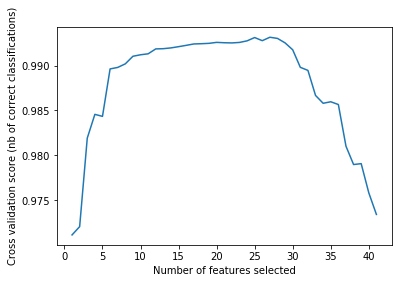

In [40]:
# classifications
lrr_clf = LogisticRegression()
rfecv = RFECV(estimator=lrr_clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(newtrain, train_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [135]:
cols = rfecv.get_support(indices=True)
ftr = newtrain.columns[cols]
list(ftr.values)

['protocol_type',
 'flag',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'root_shell',
 'num_root',
 'num_file_creations',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [42]:
newtrain_1 = newtrain[ftr.values]

num_feature = [ col for col in newtrain_1.columns if newtrain_1[col].dtype != "object"]
num_select2 = ColumnTransformer(remainder='passthrough', transformers=[('scaling', RobustScaler(),num_feature)])

lr_pipe = Pipeline([
    ('ft_union', num_select2),
    ('lr', lr_clf)
])

lr_pipe.fit(newtrain_1,train_target)

Pipeline(memory=None,
         steps=[('ft_union',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['protocol_type', 'flag',
                                                   'wrong_fragment', 'hot',
                                                   'logged_in',
                                                   'num_compromised',

In [43]:
piperf = Pipeline([
    ('transformer', num_select2),
    ('clf', rf_clf)
])
piperf.fit(newtrain_1,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['protocol_type', 'flag',
                                                   'wrong_fragment', 'hot',
                                                   'logged_in',
                                                   'num_compromise

In [44]:
pipeextra = Pipeline([
    ('transformer', num_select2),
    ('clf', extra_clf)
])
pipeextra.fit(newtrain_1,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['protocol_type', 'flag',
                                                   'wrong_fragment', 'hot',
                                                   'logged_in',
                                                   'num_compromise

In [102]:
pipesvm = Pipeline([
    ('transformer', num_select2),
    ('clf', svm_clf)
])
pipesvm.fit(newtrain_1,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['protocol_type', 'flag',
                                                   'wrong_fragment', 'hot',
                                                   'logged_in',
                                                   'num_compromise

In [46]:
pipenb = Pipeline([
    ('transformer', num_select2),
    ('clf', nb_clf)
])
pipenb.fit(newtrain_1,train_target)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaling',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['protocol_type', 'flag',
                                                   'wrong_fragment', 'hot',
                                                   'logged_in',
                                                   'num_compromise

#### Getting models performance

In [47]:
# Compute the model accuracy on the given test data and labels
lr_acc = lr_pipe.score(newvalid[ftr.values], valid_target)
# Return probability estimates for the test data
prob_labels_lr = lr_pipe.predict_proba(newvalid[ftr.values])[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(valid_target, prob_labels_lr , average = 'macro')

In [48]:
rf_acc = piperf.score(newvalid[ftr.values], valid_target)
prob_labels_rf = piperf.predict_proba(newvalid[ftr.values])[:,1]
rf_roc_auc = roc_auc_score(valid_target, prob_labels_rf , average = 'macro')

In [49]:
extra_acc = pipeextra.score(newvalid[ftr.values], valid_target)
prob_labels_extra = pipeextra.predict_proba(newvalid[ftr.values])[:,1]
extra_roc_auc = roc_auc_score(valid_target, prob_labels_extra , average = 'macro')

In [103]:
svm_acc = pipesvm.score(newvalid[ftr.values], valid_target)

In [50]:
nb_acc = pipenb.score(newvalid[ftr.values], valid_target)
prob_labels_nb = pipenb.predict_proba(newvalid[ftr.values])[:,1]
nb_roc_auc = roc_auc_score(valid_target, prob_labels_nb , average = 'macro')

In [51]:
fpr_lr, tpr_lr, thresholdr = roc_curve(valid_target, prob_labels_lr)
fpr_rf, tpr_rf, thresholdrf = roc_curve(valid_target, prob_labels_rf)
fpr_extra, tpr_extra, thresholdextra = roc_curve(valid_target, prob_labels_extra)
#fpr_svm, tpr_svm, thresholdsvm = roc_curve(valid_target, prob_labels_svm)
fpr_nb, tpr_nb, thresholdnb = roc_curve(valid_target, prob_labels_nb)


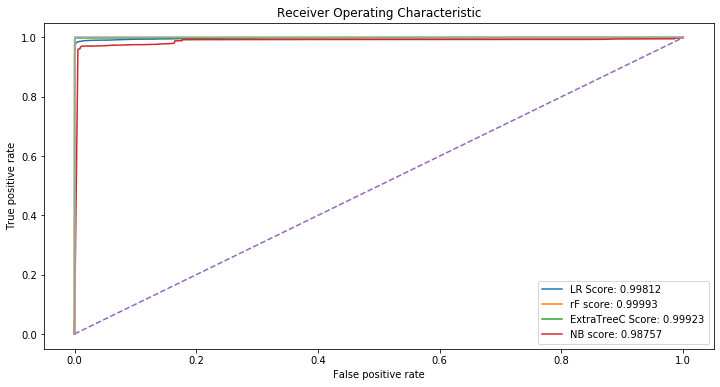

In [52]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_lr, tpr_lr, label = 'LR Score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rF score: ' + str(round(rf_roc_auc, 5)))
plt.plot(fpr_extra, tpr_extra, label = 'ExtraTreeC Score: ' + str(round(extra_roc_auc, 5)))
#plt.plot(fpr_svm, tpr_svm, label = 'SVM Score: ' + str(round(svm_roc_auc, 5)))
plt.plot(fpr_nb, tpr_nb, label = 'NB score: ' + str(round(nb_roc_auc, 5)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='best')
plt.show()

## Using cross validation for model performance

In [96]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGeneration(models, X_train, y_train, scr="roc_auc", cv = 5):
    
    cvDict = {}
    
    X_train['protocol_type'] = X_train['protocol_type'].astype('category')
    X_train['flag'] = X_train['flag'].astype('category')
    X_train['logged_in'] = X_train['logged_in'].astype('category')
    X_train['is_guest_login'] = X_train['is_guest_login'].astype('category')

    
    features = [column for column in newtrain_1.columns if( newtrain_1[column].dtype == "int64" or  newtrain_1[column].dtype == "float64")]
    num_sel = ColumnTransformer(remainder='passthrough', transformers=[('scaling', RobustScaler(),features)])
    X_train_trans = num_sel.fit_transform(X_train)    

    for model in models:
        cvScore = cross_val_score(model, X_train_trans, y_train, cv = cv, scoring = scr)
        cvDict[str(model).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [147]:
models = [lr_clf, rf_clf, extra_clf, svm_clf, nb_clf]
cvDict = cvDictGeneration(models, newtrain_1,train_target)

In [148]:
cvDict

{'LogisticRegression': [0.9980141968030569, 0.00019940113773272858],
 'RandomForestClassifier': [0.9998961636462681, 4.563440944735626e-05],
 'ExtraTreeClassifier': [0.999004277389526, 9.824989830099369e-05],
 'LinearSVC': [0.9976790555716903, 0.00028007092856478625],
 'GaussianNB': [0.9880654379012215, 0.00023370574125444784]}

In [135]:
FAR = []
pipes = [lr_pipe, piperf, pipeextra, pipenb, pipesvm]

for mod in pipes:
    p = mod.predict(newvalid[ftr.values])
    tn, fp, fn, tp = confusion_matrix(valid_target, p).ravel()
    FAR.append((fp+fn)/tp)

In [149]:
models = ['Logistic Regression(.5)', 'RandomForest', 'ExtraTreeClassifier', 'GaussianNB', "SMV"]

accuracy_DR = [lr_acc, rf_acc, extra_acc, nb_acc, svm_acc]

d = {'Accuracy or Detection Rate': accuracy_DR, 'False Alarm Rate(FAR)': FAR}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,Accuracy or Detection Rate,False Alarm Rate(FAR)
Logistic Regression(.5),0.993529,3.051156
RandomForest,0.999361,0.002743
ExtraTreeClassifier,0.999104,0.014688
GaussianNB,0.965783,0.062382
SMV,0.984133,0.069341


We can see that **Random Forest** is outperforming all the model with as lower as False Alarm Rate of $0.2743\%$. We can go with ___Random Forest___ as our model for this detection task

### Predicting with the best selected model

In [139]:
pred_test = piperf.predict(test[ftr.values])

In [141]:
print(f'Classification Report for {rf_clf.__class__.__name__}\n')
print(classification_report(test_target, pred_test))

Classification Report for RandomForestClassifier

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     47913
           1       0.99      0.81      0.89     29378

    accuracy                           0.92     77291
   macro avg       0.94      0.90      0.91     77291
weighted avg       0.93      0.92      0.92     77291



In [146]:
print(f'Confusion Matrix for {rf_clf.__class__.__name__}\n')
tn, fp, fn, tp = confusion_matrix(test_target, pred_test).ravel()
print(f'{confusion_matrix(test_target, pred_test)}|FAR:{(fp+fn)/tp}')

Confusion Matrix for RandomForestClassifier

[[47633   280]
 [ 5711 23667]]|FAR:0.25313727975662315


### Conclusion